In [1]:
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import HTML 
%matplotlib inline

Кинетическая энергия равна работе силы, которую необходимо приложить к телу для сообщения данной скорости.

пусть количество израсходованного  за 1 сек топлива (кг/с):

$ \Delta m = \dfrac{ dM_{топлива}}{dt}, кг/сек $


какую работу нужно совершить чтобы разогнать массу $\Delta m $ до скорости истечения $v$ ? 

$ \Delta A =  \dfrac{  v^2  \cdot \Delta m}{2} $


работа, совершенная за еденицу времени - т.е. это ведь наша мощность $N$.

$ N =  \dfrac{  v^2  \cdot \Delta m}{2} $

Мощность известна - это величина постоянная и равна $0.5 МВт$ с учетом к.п.д. $\eta = 0.5 $ это $N = 0.25 МВт$

Пусть нам неизвестны ни скорость истечения, ни масса, но мы знаем мощность которую мы можем тратить на разгон рабочего тела, и это $0.25МВт$

$ v = \sqrt { 2 \dfrac{ N}{\Delta m} } \space  , или \space расход \space массы:  \space \Delta m = \dfrac {2N}{v^2} = \dfrac{2 \cdot 250,000 \space Вт} {(v (м/c))^2 }$

Проверка размерностей для расхода рабочего тела:

$ \dfrac { \dfrac {кг \cdot м^2 }{c^3} }{ \dfrac{м^2}{c^2} } = \dfrac{кг}{с}$

Построим график зависимости $\Delta m(v)$ при постоянной заданной мощности, a заодно и время потраченное на расход $10,000.00$ $кг$ рабочего тела

In [2]:
data = pd.DataFrame([(2 * 250_000/(v**2), v) for v in range(1000, 201_000, 1000)], \
                    columns=['delta_m(kg)', 'v(m/s)'])

data['time_(s)'] = 10_000 / data['delta_m(kg)']

data['time_(year)'] = data['time_(s)']/60/60/24/365 # 60секунд * 60минут * 24 часа * 365 дней

data[(data['v(m/s)'] >=60000) & (data['v(m/s)'] <=80000)]

,delta_m(kg),v(m/s),time_(s),time_(year)
59,0.000139,60000,72000000.0,2.283105
60,0.000134,61000,74420000.0,2.359843
61,0.000130,62000,76880000.0,2.437849
62,0.000126,63000,79380000.0,2.517123
63,0.000122,64000,81920000.0,2.597666
64,0.000118,65000,84500000.0,2.679477
65,0.000115,66000,87120000.0,2.762557
66,0.000111,67000,89780000.0,2.846905
67,0.000108,68000,92480000.0,2.932522
68,0.000105,69000,95220000.0,3.019406


In [3]:
time_end = round(data[data['v(m/s)'] == 70000]['time_(year)'].values[0],3)

display(HTML(f'<h3>Время выработки всего топлива при скорости' + \
             f' истечения 70 км/с составит: {time_end} года.</h3>'))

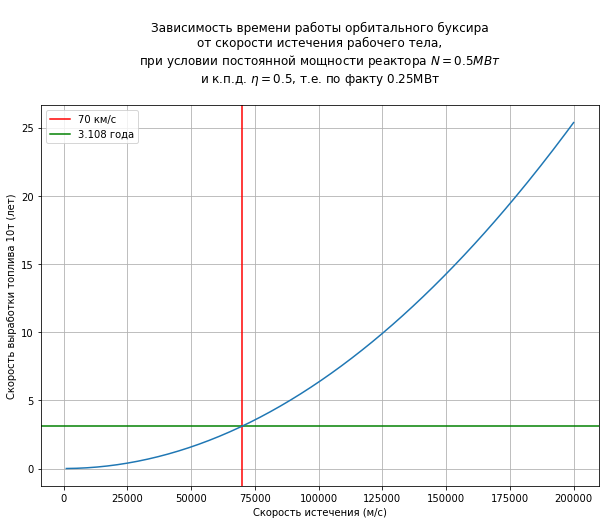

In [4]:
plt.figure(figsize=(10,7))
plt.xlabel('Скорость истечения (м/с)')
plt.ylabel('Скорость выработки топлива 10т (лет)')
plt.grid(True)
plt.title("""
Зависимость времени работы орбитального буксира
от скорости истечения рабочего тела,
при условии постоянной мощности реактора $N = 0.5 МВт$
и к.п.д. $\eta = 0.5$, т.е. по факту 0.25МВт
""")
plt.axvline(70000, color='red', label='70 км/с')
plt.axhline(time_end, color='green', label = f'{time_end} года')
plt.plot(data['v(m/s)'], data['time_(year)'])
plt.legend();

#### применим формулу Циолковского для расчета максимального приращения скорости в случае 
- Сорость истечения - 70 км/с, буксир полная масса 35, топливо 10т (за 3.108 лет работы)
- Сорость истечения - 70 км/с, буксир полная масса 55, топливо 10т (за 3.108 лет работы)
- Сорость истечения - 200 км/с, буксир полная масса 35, топливо 10т (за 25 лет работы)
- Сорость истечения - 200 км/с, буксир полная масса 55, топливо 10т (за 25 лет работы)


$ V_{конечная} = V_{истечения} \cdot \ln \left( \dfrac{M_{полная}}{ M_{полная} - M_{топлива}} \right) $

In [5]:
def calc_v_end(v, m_start, m_fuel ): 
    """
        v - скорость истечения
        m_start - начальная масса
        m_fuel - масса топлива
    """
    print(f'Скорость истечения: {v} км/с')
    print(f'Сухая масса (включая полезную нагрузку): {m_start-m_fuel} т')
    print(f'Начальная масса: {m_start} т')
    print(f'Масса топлива: {m_fuel} т')
    v_end = v*np.log(m_start/(m_start-m_fuel))
    display(HTML(f'Полное приращение скорости после расхода всего топлива: <b>{np.round(v_end,5)} км/с</b>'))
    
    return v_end

In [6]:
calc_v_end(70, 35, 10);

Скорость истечения: 70 км/с
Сухая масса (включая полезную нагрузку): 25 т
Начальная масса: 35 т
Масса топлива: 10 т


In [7]:
calc_v_end(70, 55, 10);

Скорость истечения: 70 км/с
Сухая масса (включая полезную нагрузку): 45 т
Начальная масса: 55 т
Масса топлива: 10 т


In [8]:
calc_v_end(200, 35, 10);


Скорость истечения: 200 км/с
Сухая масса (включая полезную нагрузку): 25 т
Начальная масса: 35 т
Масса топлива: 10 т


In [9]:
calc_v_end(200, 55, 10);

Скорость истечения: 200 км/с
Сухая масса (включая полезную нагрузку): 45 т
Начальная масса: 55 т
Масса топлива: 10 т
